# Fraud Detection and Analysis: Using Random Forest Model to Detect Fraudulent Credit Card Transactions
### Author: Emma Yasenchak

## Introduction 
### Credit card fraud represents an important challenge in contemporary financial transactions, posing substantial risks to individuals, businesses, and financial institutions alike. As fraudulent activities continue to evolve and adapt to advancements in technology, traditional fraud detection methods often fall short in effectively identifying and preventing fraudulent transactions. Machine learning algorithms emerged as a promising solution to combat credit card fraud by leveraging advanced data analytics and pattern recognition techniques. These algorithms can analyze vast datasets of transaction records, identifying subtle anomalies and patterns indicative of fraudulent behavior in real-time. In this notebook, I attempt to use the Random Forest algorithm to explore how machine learning can combat fraud. The Random Forest model stands out as a popular choice for addressing credit card fraud detection due to its known robustness, scalability, and interpretability. By constructing an ensemble of decision trees, Random Forest can effectively handle high-dimensional data, handle imbalanced datasets common in fraud detection scenarios, and provide insights into the features driving fraudulent activities. Exploring the problem of credit card fraud using Random Forest enables financial institutions and payment processors to enhance their fraud detection capabilities, proactively safeguarding people's money and preserving the integrity of financial systems in an increasingly digital and interconnected world.

## External Sources referenced/learned from:

- https://www.kaggle.com/code/ayushkumar1603/credit-card-fraud-detection-with-99-accuracy
- https://www.stuffmakesmehappy.com/knowledgebase/how-to-test-overfitting-in-random-forest
- https://medium.com/edureka/python-introduction-to-numpy-numpy-tutorial-4ac06c717971
- https://medium.com/@codewithnazam/what-is-pandas-in-python-codewithnazam-025fb7f639ac
- https://medium.com/intellipaat/scikit-learn-tutorial-machine-learning-in-python-4d668d8a1e98
- https://medium.com/analytics-vidhya/become-a-data-visualization-whiz-with-this-comprehensive-guide-to-seaborn-in-python-3841f40e3a3b
- https://www.geeksforgeeks.org/python-introduction-matplotlib/
- https://medium.com/@lp.dataninja/what-is-python-matplotlib-e4e33f118e7
- https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
- https://amanxyx.medium.com/building-a-random-forest-classifier-using-scikit-learn-in-python-433a7a3fbd3b
- https://medium.com/edureka/classification-in-machine-learning-2402675b7817
- https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5
- https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/
- https://medium.com/@rinu.gour123/train-and-test-set-in-python-machine-learning-how-to-split-58029a0d657b
- https://medium.com/analytics-vidhya/auc-roc-curve-in-machine-learning-clearly-explained-1849b3fa4bfc
- https://medium.com/@24littledino/precision-and-recall-in-python-e546a798cc3b
- https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

## Dataset Used:

https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data

## Documentation Resources Used: 

- https://pandas.pydata.org/docs/
- https://numpy.org/doc/stable/
- https://seaborn.pydata.org/
- https://matplotlib.org/stable/index.html

## Information about the Dataset from the URL above:

About Dataset
Description:
This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

Key Features:
- id: Unique identifier for each transaction
- V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- Amount: The transaction amount
- Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [7]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Import Libraries 

In [29]:
# Data processing
import pandas as pd
import os

# Import NUMPY for arrays
import numpy as np

# Data visulization
import seaborn as sns
import matplotlib.pyplot as plt

# SKLEARN for importing Random Forest classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn import tree
from sklearn.tree import plot_tree

### Data Collection and Analysis

Shape of the data: 
(568630, 31)


Summary of the Dataset: 
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.31256

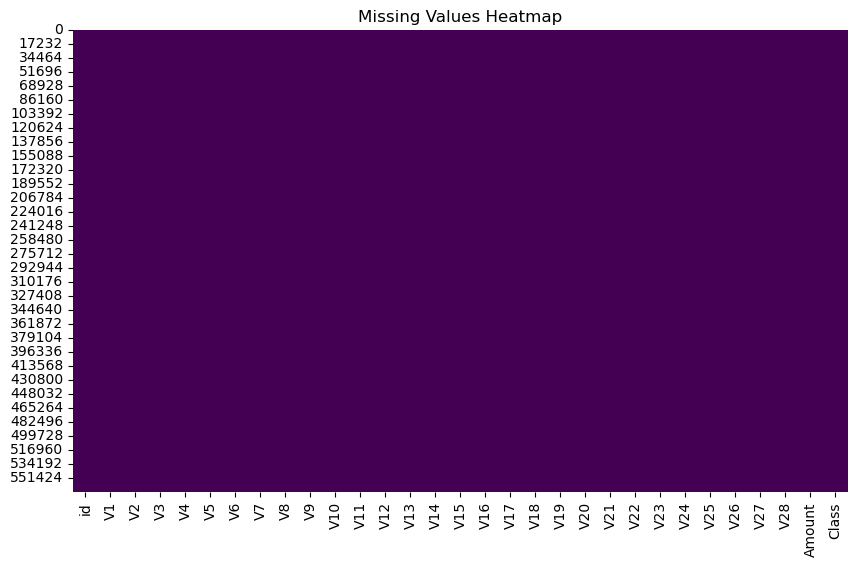



Duplicate Rows:
0


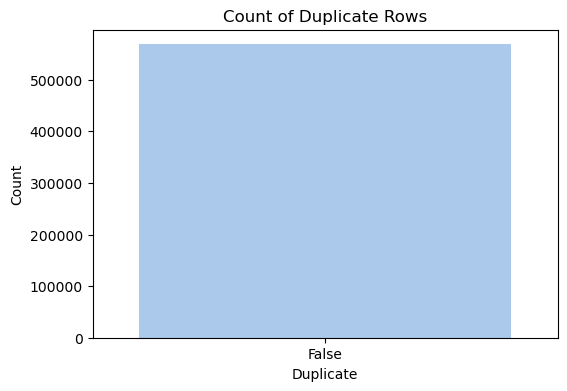

In [9]:
# Load the dataset
# dataset downloaded from: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data
data = pd.read_csv('creditcard_2023.csv')

##### Explore the dataset #####

# provides the shape of the data
print("Shape of the data: ")
print(data.shape)
print("\n")

# provides a visual summary of the dataset
print("Summary of the Dataset: ")
print(data.head())
print("\n")
   
# provides data information
print("Data Info: ")
print(data.info())
print("\n")

# provides descriptive statistics about the data
print("Descriptive Statistics: ")
print(data.describe())
print("\n")

# Check for missing values
missing_values = data.isnull()

print("Missing Values:")
print(missing_values.sum())  # Summarize missing values by column

# Visualize missing values using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

print("\n")

# Check for duplicate rows
duplicate_rows = data.duplicated()

print("Duplicate Rows:")
print(duplicate_rows.sum())  # Summarize duplicate rows

# Visualize duplicate rows
plt.figure(figsize=(6, 4))
sns.countplot(x=duplicate_rows, palette='pastel')
plt.title('Count of Duplicate Rows')
plt.xlabel('Duplicate')
plt.ylabel('Count')
plt.show()


Observations about the Dataset: 
- The columns labeled 'Vi', are anonymized, meaning that we don't know what the columns represent for the purposes of protecting people's private data, but we can still make some useful predications using this data.
- There are 568630 rows and 31 columns
- There are no missing values to handle
- No duplicate rows
- No categorical values (although the 'Class' column has categorical values represented as integers through one-hot-encoding)

Now that we've analyzed the dataset, let's engineer it so that it will be ready to be analyzed by the model.

### Data Preprocessing

In [10]:
# X represents the features in the pandas dataframe
# Y represents the target variables (in this dataset, 'Class' is the target variable column)
# The 'id' column is removed because this variable will not be useful for training the model
X = data.drop(columns=['Class', 'id'], axis = 1)
y = data['Class']

# View count of each class to check for data imbalance
print("Class Counts:")
y.value_counts()

Class Counts:


0    284315
1    284315
Name: Class, dtype: int64

In [11]:
# '.values' converts a pandas dataframe to a numpy array, which will be more efficient and flexible for data engineering tasks
X = data.drop(columns=['Class', 'id'], axis = 1).values
y = data['Class'].values

In [12]:
# Check to see if the feature and target variable columns have been separated properly before splitting the dataset into trianing and testing sets
expected_feature_columns = data.columns.difference(['Class', 'id'])

if set(expected_feature_columns) == set(data.columns) - set(['Class', 'id']):
    print("Feature and target variable columns have been separated properly.")
else:
    print("Feature and target variable columns have not been separated properly.")


Feature and target variable columns have been separated properly.


In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Instantiate the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [15]:
# Train the classifier
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [16]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9998329317834093


Although the accuracy is at an impressive 99.98%, checking for accuracy is not enough to determine class performance. We need to further investigate how well the model did through other methods. 

In [17]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



According to the Classification Report, the model did very well correctly classifying each credit card transaction as 
either Class 0 (negatives) or Class 1 (positives). The value 1.0 indicates that the model has performed exceptionally well, achieving perfect precision, recall, and F1-score for both classes, as well as a perfect accuracy score on the dataset. Now, we need to check how well the model predicted for each class using a confusion matrix.

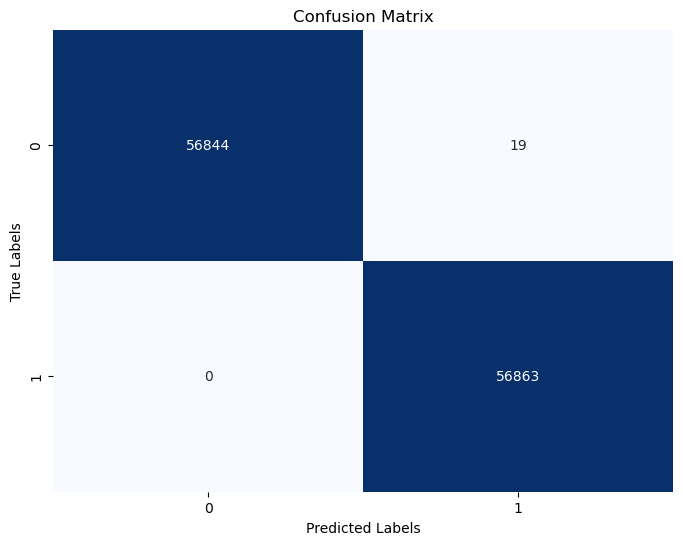

In [20]:
# Generate confusion matrix
# About confusion matrix: 
#                    actual values
# -------------------------------------
#              |  positive negative
#   predicted  |     TP        FP
#   values     |     FN        TN

# Create a heatmap using Seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The confusion matrix indicates that there were 19 false positives, 0 false negatives, with the rest of the data predicted correctly. It is common, even in the best fraud detection algorithms, to have a generally higher false positive rate (for this model and data, 19 instances were incorrectly classified as class 1). 

Next, I will further check the model's performance by a ROC AUC score. This metric summarizes the performance of a binary classification model, in terms of its ability to correctly classify positive and negative instances across various threshold settings.

In [ ]:
# Make predictions on the test set
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC Score:", roc_auc)

This high of an ROC AUC score indicates that the model's true positive rate (sensitivity) is very high while its false positive rate (1 - specificity) is extremely low, resulting in an almost ideal ROC curve. Let's plot the graph for this!

In [ ]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate precision score
precision = precision_score(y_test, y_pred)

print("Precision Score:", precision)

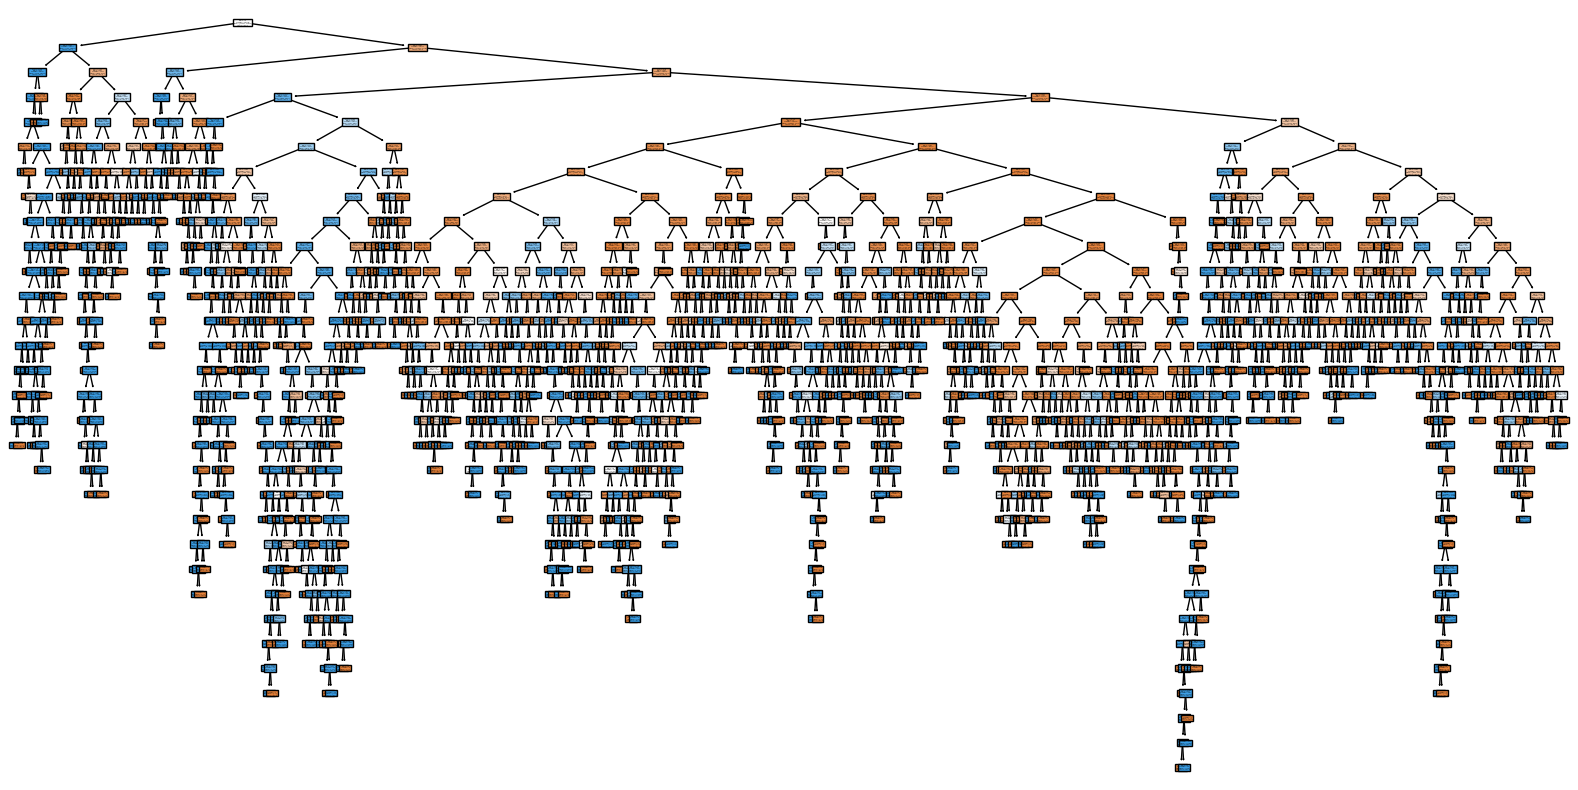

In [23]:
feature_names = data.columns.tolist()  # Get column names as feature names
class_names = ['Class 0', 'Class 1'] 

plt.figure(figsize=(20, 10))
tree.plot_tree(rf.estimators_[0], feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

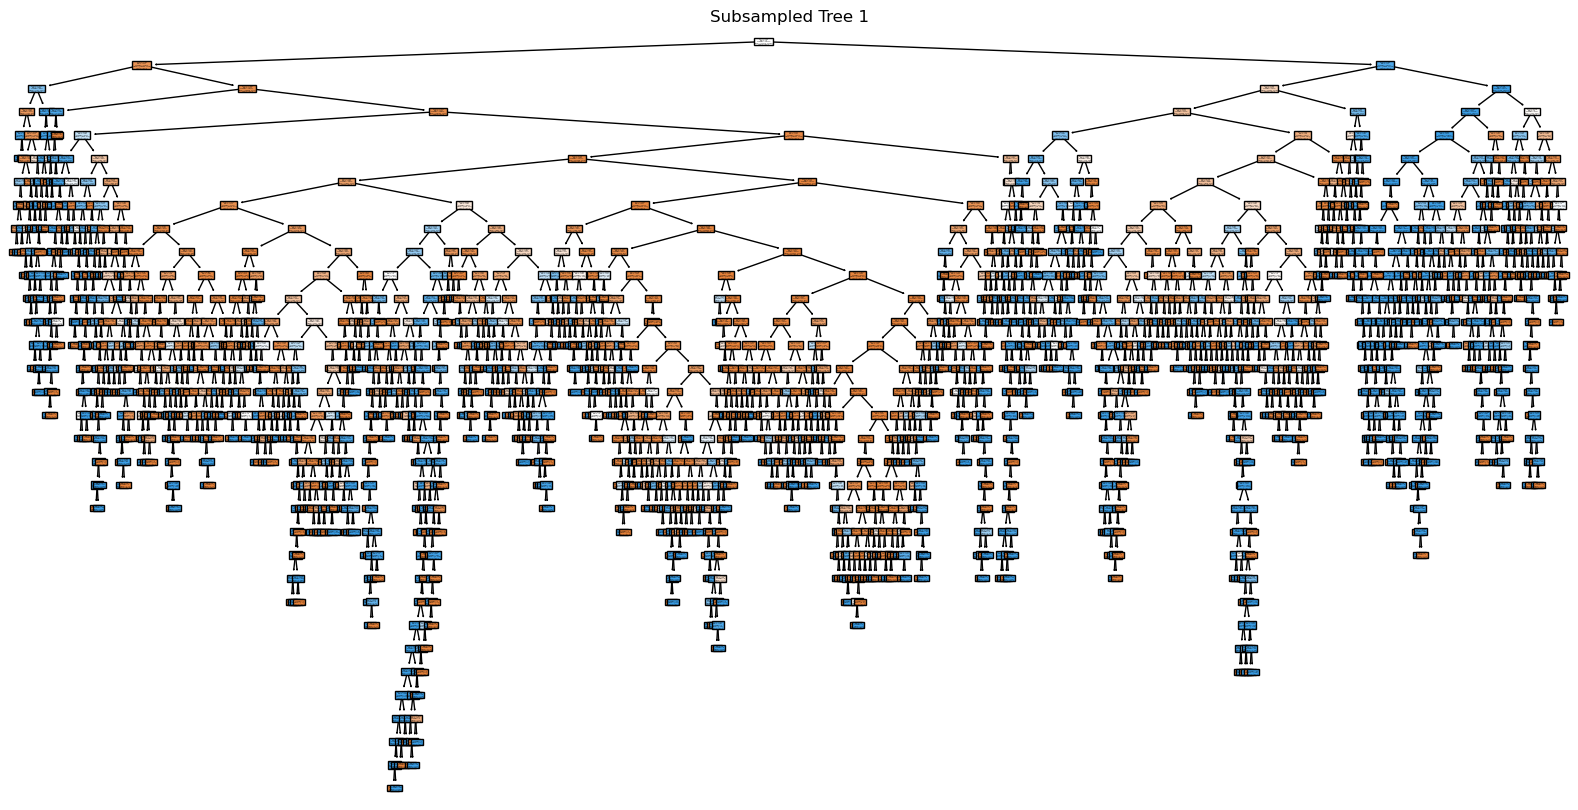

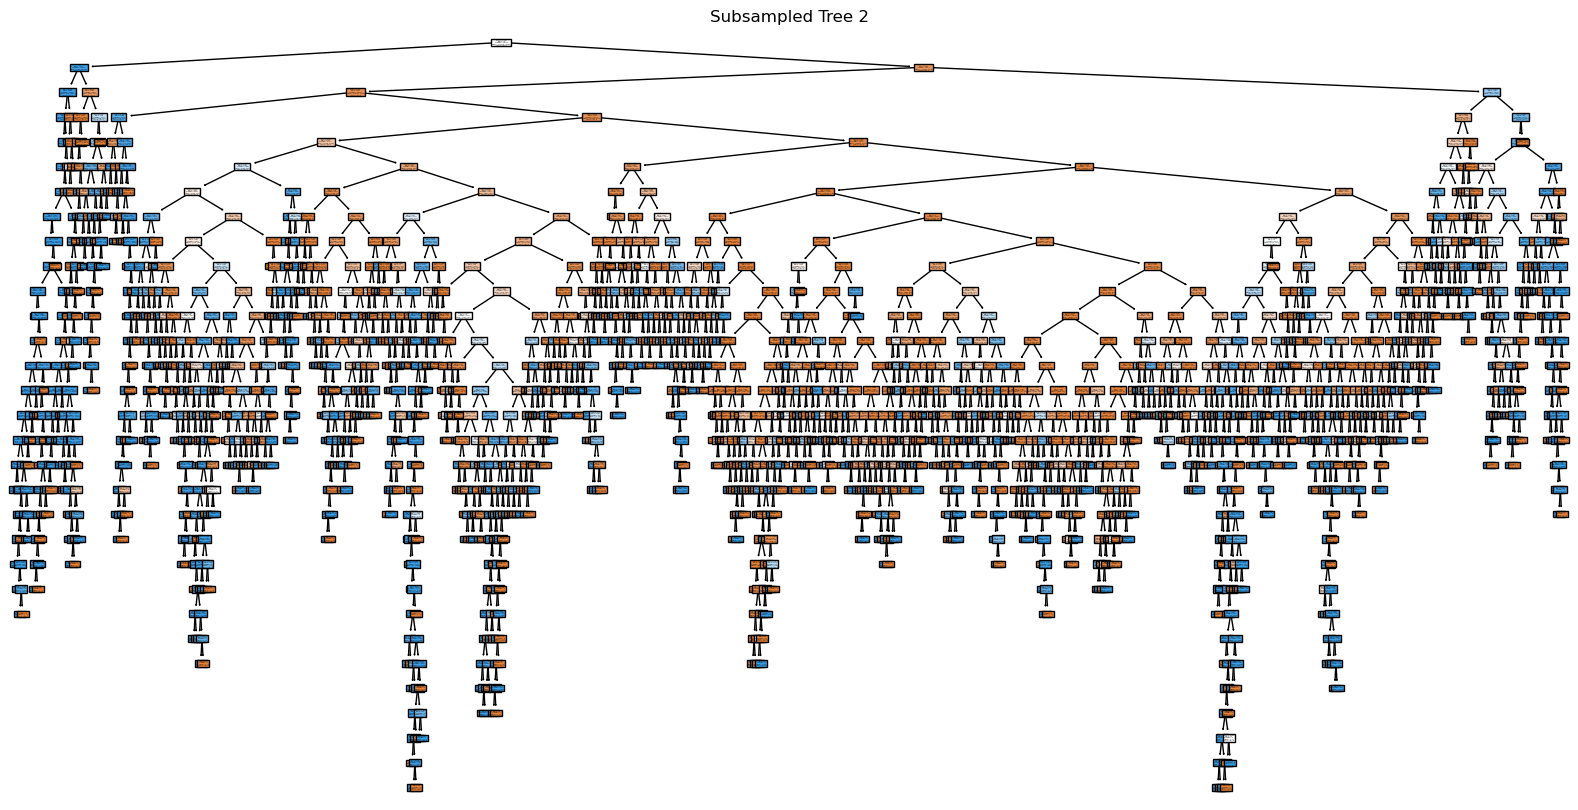

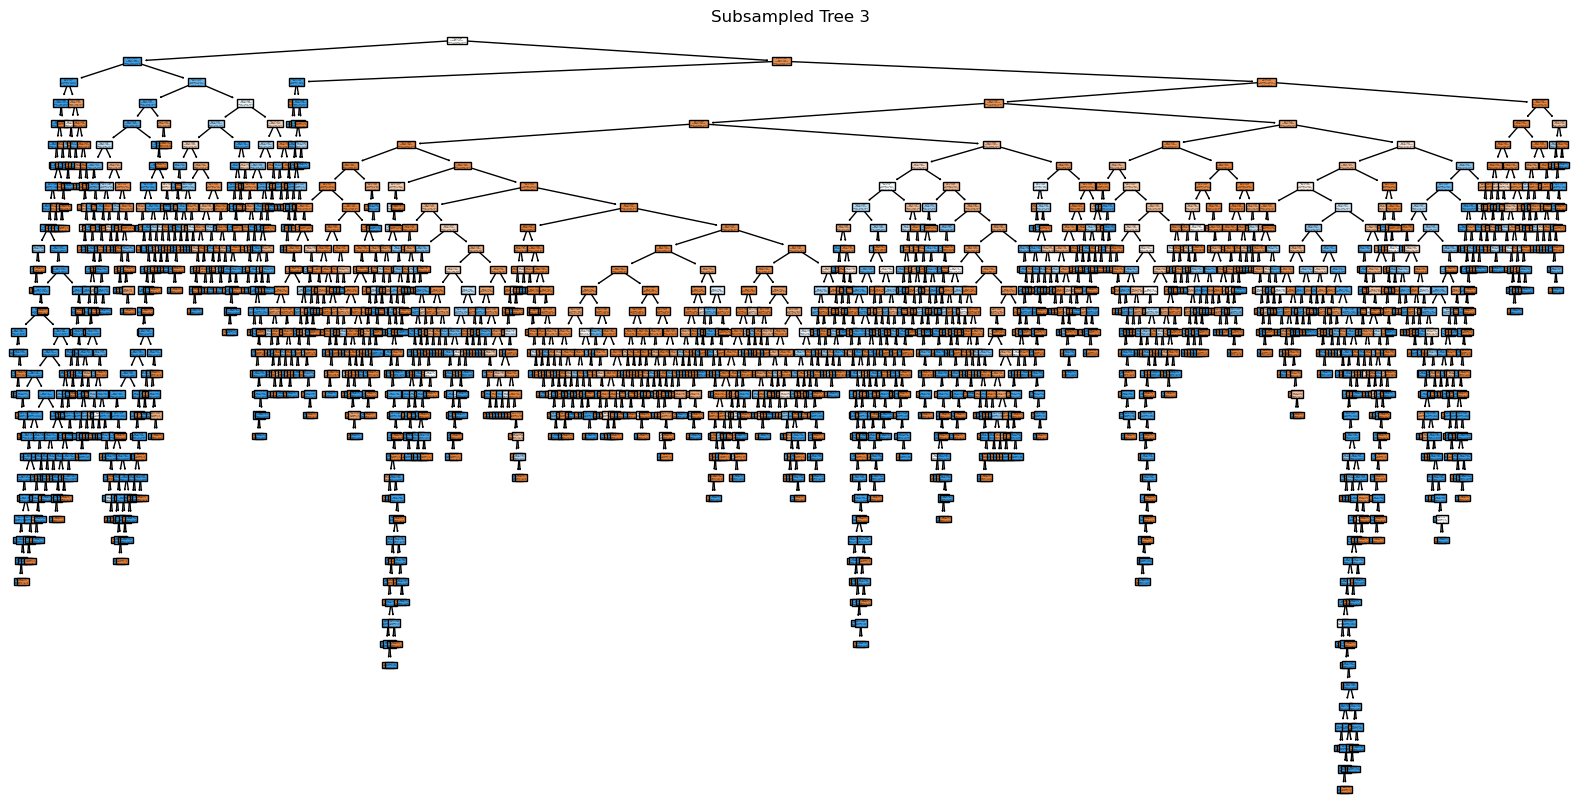

In [33]:
# Get the total number of trees in the Random Forest
total_trees = len(rf.estimators_)

# Select a random subset of trees
selected_tree_indices = np.random.choice(total_trees, size=3, replace=False)
subsampled_trees = [rf.estimators_[i] for i in selected_tree_indices]

# Visualize the subsampled trees
for i, tree in enumerate(subsampled_trees):
    plt.figure(figsize=(20, 10))
    plot_tree(tree, feature_names=feature_names, class_names=class_names, filled=True)
    plt.title(f"Subsampled Tree {i+1}")
    plt.show()

## Conclusion
### While there is room for further exploration into tuning the hyperparameters of the model and investigating false positives, the analysis of various metrics, including ROC AUC for binary classification models, has demonstrated the effectiveness of the developed model in predicting fraudulent (1) and non-fraudulent (0) credit card transactions. Despite these potential areas for enhancement, the model showcases robust performance without overfitting to the data. 

### By systematically evaluating a variety of metrics, including the ROC AUC score, we have gained valuable insights into the model's predictive capabilities and its ability to discern between fraudulent and legitimate transactions. The consistently high performance across multiple evaluation criteria underscores the reliability and accuracy of the model's predictions.

### Looking ahead, further refinement and fine-tuning of the model's hyperparameters could potentially enhance its predictive power and mitigate instances of false positives. Additionally, ongoing monitoring and evaluation of the model's performance against evolving fraud patterns and transactional data will be essential to ensure its continued effectiveness in safeguarding against fraudulent activities.

### Overall, the developed model represents a significant step forward in combating credit card fraud, providing financial institutions and payment processors with a powerful tool to protect their customers and preserve the integrity of financial transactions in an increasingly digital landscape.

